<a href="https://colab.research.google.com/github/WenxuanDU/Machine-Learning/blob/main/Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/econ441b/insurance.csv")

In [ ]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

df.loc[df["smoker"] == "yes","smoker"] = 1.
df.loc[df["smoker"] == "no","smoker"] = 0.

df=pd.get_dummies(df,columns=['region'])
column_to_move = df.pop("charges")
df.insert(0,"charges",column_to_move)
df.head()

,charges,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,1.0,27.900,0,1.0,0,0,0,1
1,1725.55230,18,0.0,33.770,1,0.0,0,0,1,0
2,4449.46200,28,0.0,33.000,3,0.0,0,0,1,0
3,21984.47061,33,0.0,22.705,0,0.0,0,1,0,0
4,3866.85520,32,0.0,28.880,0,0.0,0,1,0,0


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
data = np.array(df.iloc[:,1:])
target = np.array(df.iloc[:,0])

In [ ]:
cut = int((len(data)*.8)//1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV
modCV=LassoCV().fit(in_data_scale,in_target)
a=modCV.alpha_

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso
mod = Lasso(alpha=a).fit(in_data_scale,in_target)

# 6.) Visualize the coefficients

In [ ]:
mod.predict(np.array(in_data_scale))
mod.coef_

array([3528.02573535,    0.        , 1826.25842562,  357.05552225,
       9280.6004751 ,  184.56649395,    0.        ,   -0.        ,
        -65.22282232])

In [ ]:
coef_df = pd.DataFrame({'coef': mod.coef_[:],
                        'varname': df.index.values[:9]
                       })

<ipython-input-127-2f9b6c189059>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


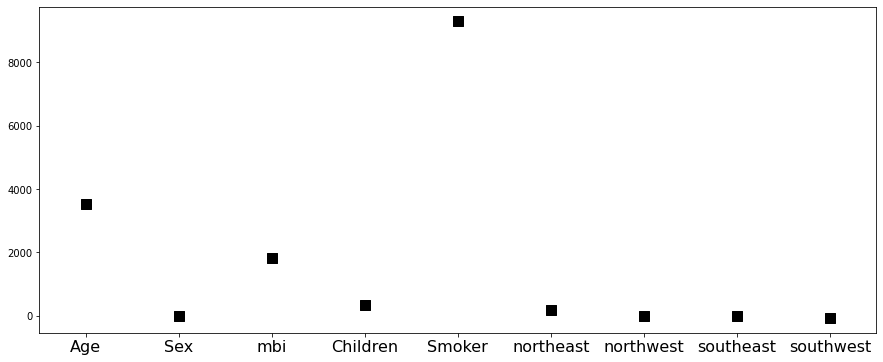

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
coef_df.plot(x='varname', y='coef', kind='bar',
             ax=ax, color='none',  legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]),
           marker='s', s=120,
           y=coef_df['coef'], color='black')
_ = ax.set_xticklabels(['Age', 'Sex', 'mbi', 'Children', 'Smoker','northeast','northwest','southeast','southwest'],
                       rotation=0, fontsize=16)

# 7.) Interpret the coefficients

1. With one unit change in Age is predicted to have 3528 unit change in insurance charge.
2. Sex，northwest and northeast are not influencial to insurance charge.
3. One unit more mbi is predicted to cause 1826 rise in insurance charges.
4. If one is a smoker, he is predicted to spend 9280 more in insurance.
5. If one is from northeast, he is predicted to spend 184 more in insurance.
6. If one is from southwest, he is predicted to spend-65 less in insurance.

# 8.) Compare in and out of sample MSE’s

In [ ]:
import sklearn

In [ ]:
mod2 = Lasso(alpha=a).fit(out_data_scale,out_target)


In [ ]:
pred_train=mod.predict(in_data_scale)
pred_test=mod2.predict(out_data_scale)

In [ ]:
sklearn.metrics.mean_squared_error(in_target, pred_train)

36603129.01103468

In [ ]:
sklearn.metrics.mean_squared_error(out_target, pred_test)

36640657.98955949

in and out sample MSEs are very similar.